# 기말고사 예상문제
> 빅데이터분석특강

> 기말고사 예상문제
- toc:false
- branch: master
- badges: true
- comments: true
- author: 심재인

## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
%load_ext tensorboard

In [4]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

In [5]:
#!conda install -c conda-forge python-graphviz -y

## 1. Fashion_mnist, DNN (30점)

`(1)` `tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라.

- 평가지표로 accuracy를 이용할 것
- epoch은 10으로 설정할 것
- optimizer는 adam을 이용할 것

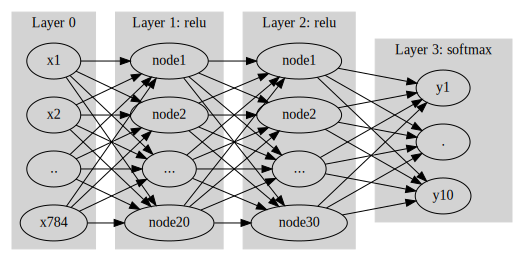

In [6]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    "x784" -> "node1"
    
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node20"
    "x2" -> "node20"
    ".." -> "node20"
    "x784" -> "node20"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "node1 "
    "node2" -> "node1 "
    "..." -> "node1 "
    "node20" -> "node1 "
    
    "node1" -> "node2 "
    "node2" -> "node2 "
    "..." -> "node2 "
    "node20" -> "node2 "
    
    "node1" -> "... "
    "node2" -> "... "
    "..." -> "... "
    "node20" -> "... "

    "node1" -> "node30 "
    "node2" -> "node30 "
    "..." -> "node30 "
    "node20" -> "node30 "


    label = "Layer 2: relu"
}
subgraph cluster_4{
    style=filled;
    color=lightgrey;

    "node1 " -> "y10"
    "node2 " -> "y10"
    "... " -> "y10"
    "node30 " -> "y10"
    
    "node1 " -> "y1"
    "node2 " -> "y1"
    "... " -> "y1"
    "node30 " -> "y1"
    
    "node1 " -> "."
    "node2 " -> "."
    "... " -> "."
    "node30 " -> "."
    
    label = "Layer 3: softmax"
}
''')


In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [8]:
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

2022-06-13 18:07:06.073347: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [9]:
tf.random.set_seed(4305)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])
net.fit(X,y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5931 - accuracy: 0.5048
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9580 - accuracy: 0.6069
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9079 - accuracy: 0.6217
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8931 - accuracy: 0.6271
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8732 - accuracy: 0.6290
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8751 - accuracy: 0.6310
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8634 - accuracy: 0.6353
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8578 - accuracy: 0.6340
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8427 - accuracy: 0.6371
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.852

`(2)` (1)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라.

In [10]:
net.evaluate(XX,yy)

313/313 [==============================] - 0s 1ms/step - loss: 0.8463 - accuracy: 0.6357


[0.8462827205657959, 0.635699987411499]

`(3)` train set에서 20%의 자료를 validation 으로 분리하여 50에폭동안 학습하라. 텐서보드를 이용하여 train accuracy와 validation accuracy를 시각화 하고 결과를 해석하라. 오버피팅이라고 볼 수 있는가?

In [11]:
tf.random.set_seed(4305)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

In [12]:
#collapse_output
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=50,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/50
240/240 [==============================] - 1s 2ms/step - loss: 3.7604 - accuracy: 0.2533 - val_loss: 1.8268 - val_accuracy: 0.3212
Epoch 2/50
240/240 [==============================] - 0s 1ms/step - loss: 1.7592 - accuracy: 0.3275 - val_loss: 1.6927 - val_accuracy: 0.3509
Epoch 3/50
240/240 [==============================] - 0s 2ms/step - loss: 1.6008 - accuracy: 0.3767 - val_loss: 1.5118 - val_accuracy: 0.4139
Epoch 4/50
240/240 [==============================] - 1s 3ms/step - loss: 1.4380 - accuracy: 0.4215 - val_loss: 1.3867 - val_accuracy: 0.4374
Epoch 5/50
240/240 [==============================] - 1s 2ms/step - loss: 1.3066 - accuracy: 0.4505 - val_loss: 1.2980 - val_accuracy: 0.4444
Epoch 6/50
240/240 [==============================] - 1s 2ms/step - loss: 1.2581 - accuracy: 0.4582 - val_loss: 1.2748 - val_accuracy: 0.4487
Epoch 7/50
240/240 [==============================] - 1s 3ms/step - loss: 1.2330 - accuracy: 0.4642 - val_loss: 1.2586 - val_accuracy: 0.4619
Epoch 

In [13]:
%tensorboard --logdir logs --host 0.0.0.0 

`(4)` (3)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. (2)의 결과와 비교하라.

In [14]:
net.evaluate(XX,yy)

313/313 [==============================] - 1s 1ms/step - loss: 0.6004 - accuracy: 0.8104


[0.6003509759902954, 0.8104000091552734]

`(5)` 조기종료기능을 이용하여 (3)의 네트워크를 다시 학습하라. 학습결과를 텐서보드를 이용하여 시각화 하라. 
- patience=3 으로 설정할 것

In [15]:
tf.random.set_seed(4305)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

In [16]:
cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=3)
net.fit(X,y,epochs=50,batch_size=200,validation_split=0.2,callbacks=[cb1,cb2]) 

Epoch 1/50
240/240 [==============================] - 1s 2ms/step - loss: 3.7604 - accuracy: 0.2533 - val_loss: 1.8268 - val_accuracy: 0.3212
Epoch 2/50
240/240 [==============================] - 0s 2ms/step - loss: 1.7592 - accuracy: 0.3275 - val_loss: 1.6927 - val_accuracy: 0.3509
Epoch 3/50
240/240 [==============================] - 0s 2ms/step - loss: 1.6008 - accuracy: 0.3767 - val_loss: 1.5118 - val_accuracy: 0.4139
Epoch 4/50
240/240 [==============================] - 1s 3ms/step - loss: 1.4379 - accuracy: 0.4222 - val_loss: 1.3775 - val_accuracy: 0.4302
Epoch 5/50
240/240 [==============================] - 0s 2ms/step - loss: 1.3140 - accuracy: 0.4486 - val_loss: 1.3151 - val_accuracy: 0.4382
Epoch 6/50
240/240 [==============================] - 1s 2ms/step - loss: 1.2642 - accuracy: 0.4572 - val_loss: 1.2761 - val_accuracy: 0.4493
Epoch 7/50
240/240 [==============================] - 1s 4ms/step - loss: 1.2326 - accuracy: 0.4636 - val_loss: 1.2428 - val_accuracy: 0.4622
Epoch 

In [17]:
%tensorboard --logdir logs --host 0.0.0.0 

Reusing TensorBoard on port 6006 (pid 1475105), started 0:00:15 ago. (Use '!kill 1475105' to kill it.)

## 2. Fashion_mnist, CNN (30점)

`(1)` `tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라.

- 이때 n1=6, n2=16, n3=120 으로 설정한다, 드랍아웃비율은 20%로 설정한다.
- `net.summary()`를 출력하여 설계결과를 확인하라.

![](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

In [18]:
tf.random.set_seed(4305)
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Conv2D(6,(4,4),activation='relu'))
net1.add(tf.keras.layers.MaxPool2D()) 
net1.add(tf.keras.layers.Conv2D(16,(4,4),activation='relu'))
net1.add(tf.keras.layers.MaxPool2D()) 
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(120,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.add(tf.keras.layers.Dropout(0.2))
net1.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')
net1.fit(X,y,epochs=5,batch_size=200)

Epoch 1/5
300/300 [==============================] - 2s 2ms/step - loss: 4.7347 - accuracy: 0.5660
Epoch 2/5
300/300 [==============================] - 1s 2ms/step - loss: 3.5843 - accuracy: 0.6647
Epoch 3/5
300/300 [==============================] - 1s 3ms/step - loss: 3.5181 - accuracy: 0.6823
Epoch 4/5
300/300 [==============================] - 2s 5ms/step - loss: 3.4991 - accuracy: 0.6916
Epoch 5/5
300/300 [==============================] - 1s 2ms/step - loss: 3.4950 - accuracy: 0.6990


In [19]:
net1.evaluate(XX,yy)

313/313 [==============================] - 0s 1ms/step - loss: 0.4629 - accuracy: 0.8334


[0.46292147040367126, 0.8334000110626221]

In [20]:
net1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 6)         102       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 16)          1552      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [21]:
c1, m1, c2, m2, flttn, dns1, dns2, dropout = net1.layers

In [22]:
print(X.shape)
print(c1(X).shape) 
print(m1(c1(X)).shape)
print(c2(m1(c1(X))).shape)
print(m2(c2(m1(c1(X)))).shape)
print(flttn(m2(c2(m1(c1(X))))).shape)
print(dns1(flttn(m2(c2(m1(c1(X)))))).shape)
print(dns2(dns1(flttn(m2(c2(m1(c1(X))))))).shape)
print(dropout(dns2(dns1(flttn(m2(c2(m1(c1(X)))))))).shape)

(60000, 28, 28, 1)
(60000, 25, 25, 6)
(60000, 12, 12, 6)
(60000, 9, 9, 16)
(60000, 4, 4, 16)
(60000, 256)
(60000, 120)
(60000, 10)
(60000, 10)


`(2)` n1=(6,64,128), n2=(16,256)에 대하여 test set의 loss가 최소화되는 조합을 찾아라. 결과를 텐서보드로 시각화하는 코드를 작성하라.
- epoc은 3회로 한정한다.
- validation_split은 0.2로 설정한다.

In [23]:
from tensorboard.plugins.hparams import api as hp

In [24]:
!rm -rf logs
for u in [6,64,128]: 
    for d in [16,256]: 
        logdir = 'logs/hpguebin_{}_{}'.format(u,d)
        with tf.summary.create_file_writer(logdir).as_default():
            tf.random.set_seed(4305)
            net1 = tf.keras.Sequential()
            net1.add(tf.keras.layers.Conv2D(6,(4,4),activation='relu'))
            net1.add(tf.keras.layers.MaxPool2D()) 
            net1.add(tf.keras.layers.Conv2D(16,(4,4),activation='relu'))
            net1.add(tf.keras.layers.MaxPool2D()) 
            net1.add(tf.keras.layers.Flatten())
            net1.add(tf.keras.layers.Dense(120,activation='relu'))
            net1.add(tf.keras.layers.Dense(10,activation='softmax'))
            net1.add(tf.keras.layers.Dropout(0.2))
            net1.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')
            cb3 = hp.KerasCallback(logdir, {'n1':u, 'n2':d})
            net1.fit(X,y,epochs=3,batch_size=200,callbacks=cb3,validation_split=0.2)
            _rslt=net.evaluate(XX,yy) 
            tf.summary.scalar('test set loss', _rslt[0], step=1)

Epoch 1/3
240/240 [==============================] - 1s 3ms/step - loss: 4.5247 - accuracy: 0.5634 - val_loss: 0.6971 - val_accuracy: 0.7641
Epoch 2/3
240/240 [==============================] - 1s 2ms/step - loss: 3.6050 - accuracy: 0.6616 - val_loss: 0.5841 - val_accuracy: 0.7986
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.7856 - accuracy: 0.7178
Epoch 1/3
240/240 [==============================] - 1s 2ms/step - loss: 4.5250 - accuracy: 0.5634 - val_loss: 0.6955 - val_accuracy: 0.7667
Epoch 2/3
240/240 [==============================] - 0s 2ms/step - loss: 3.6047 - accuracy: 0.6609 - val_loss: 0.5796 - val_accuracy: 0.8022
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.7856 - accuracy: 0.7178
Epoch 1/3
240/240 [==============================] - 1s 2ms/step - loss: 4.5250 - accuracy: 0.5634 - val_loss: 0.6955 - val_accuracy: 0.7667
Epoch 2/3
240/240 [==============================] - 0s 2ms/step - loss: 3.6043 - accuracy: 0.661

In [25]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 1475105), started 0:00:37 ago. (Use '!kill 1475105' to kill it.)

## 3. CIFAR10 (30점)

`tf.keras.datasets.cifar10.load_data()`을 이용하여 CIFAR10을 불러온 뒤 적당한 네트워크를 사용하여 적합하라.

- 결과를 텐서보드로 시각화할 필요는 없다.
- 자유롭게 모형을 설계하여 적합하라.
- test set의 accuracy가 70%이상인 경우만 정답으로 인정한다.

In [26]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [28]:
X = tf.constant(x_train.reshape(-1,32,32,3),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,32,32,3),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

In [29]:
print(X.shape)
print(y.shape)
print(XX.shape)
print(yy.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [30]:
net2 = tf.keras.Sequential()
net2.add(tf.keras.layers.Conv2D(512,(2,2),activation='relu'))
net2.add(tf.keras.layers.Conv2D(512,(2,2),activation='relu'))
net2.add(tf.keras.layers.Dropout(0.5))
net2.add(tf.keras.layers.MaxPool2D()) 
net2.add(tf.keras.layers.Conv2D(512,(2,2),activation='relu'))
net2.add(tf.keras.layers.Conv2D(512,(2,2),activation='relu'))
net2.add(tf.keras.layers.Dropout(0.5))
net2.add(tf.keras.layers.MaxPool2D()) 
net2.add(tf.keras.layers.Flatten())
net2.add(tf.keras.layers.Dense(10,activation='softmax'))
net2.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [31]:
net2.fit(X,y,epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 44s 35ms/step - loss: 2.2100 - accuracy: 0.4334 - val_loss: 1.4963 - val_accuracy: 0.5213
Epoch 2/5
1250/1250 [==============================] - 43s 35ms/step - loss: 1.2402 - accuracy: 0.5626 - val_loss: 1.3536 - val_accuracy: 0.5743
Epoch 3/5
1250/1250 [==============================] - 43s 35ms/step - loss: 1.1110 - accuracy: 0.6104 - val_loss: 1.2189 - val_accuracy: 0.6069
Epoch 4/5
1250/1250 [==============================] - 43s 35ms/step - loss: 1.0174 - accuracy: 0.6427 - val_loss: 1.1409 - val_accuracy: 0.6466
Epoch 5/5
1250/1250 [==============================] - 43s 35ms/step - loss: 0.9725 - accuracy: 0.6606 - val_loss: 1.0891 - val_accuracy: 0.6455


In [32]:
net2.fit(X,y,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.9142 - accuracy: 0.6825 - val_loss: 1.0787 - val_accuracy: 0.6388
Epoch 2/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.8797 - accuracy: 0.6935 - val_loss: 1.0044 - val_accuracy: 0.6667
Epoch 3/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.8509 - accuracy: 0.7039 - val_loss: 0.9295 - val_accuracy: 0.6799
Epoch 4/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.8338 - accuracy: 0.7113 - val_loss: 0.9554 - val_accuracy: 0.6747
Epoch 5/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.8201 - accuracy: 0.7141 - val_loss: 1.0631 - val_accuracy: 0.6435
Epoch 6/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.8030 - accuracy: 0.7235 - val_loss: 0.9158 - val_accuracy: 0.6929
Epoch 7/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.7904 - accuracy: 0.7266 - val_loss: 0.9175 -

In [33]:
net2.evaluate(XX,yy)

313/313 [==============================] - 4s 11ms/step - loss: 0.8638 - accuracy: 0.7041


[0.8638339042663574, 0.7041000127792358]

## 4. 다음을 읽고 물음에 답하라. (10점)

(1) (1,128,128,3)의 shape을 가진 텐서가 `tf.keras.layers.Conv2D(5,(2,2))`으로 만들어진 커널을 통과할시 나오는 shape은?

In [34]:
tf.random.set_seed(43052)
cnv = tf.keras.layers.Conv2D(5,(2,2))
XXX = tnp.array([1]*1*128*128*3,dtype=tf.float64).reshape(1,128,128,3)

In [35]:
cnv(XXX)

<tf.Tensor: shape=(1, 127, 127, 5), dtype=float32, numpy=
array([[[[-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         [-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         [-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         ...,
         [-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         [-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         [-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703]],

        [[-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         [-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         [-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         ...,
         [-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         [-0.7661123 , -0.81788373,  0.151829  , -0.

답 : (1, 127, 127, 5)

(2) (1,24,24,16)의 shape을 가진 텐서가 `tf.keras.layers.Flatten()`을 통과할때 나오는 텐서의 shape은?

In [36]:
24*24*16

9216

답 : (1, 9216)

(3)

(4)

(5)